In [1]:
#install depenencies
!pip install kaggle

In [2]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jety2021329206","key":"035bf7ada73bdcf7e45954662d427def"}'}

In [3]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#import the dataset we want to use for our project
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.50G/9.51G [01:32<00:00, 43.5MB/s]
100% 9.51G/9.51G [01:32<00:00, 111MB/s] 


In [6]:
#lets see the imported files from kaggle competetion
!ls

aptos2019-blindness-detection.zip  sample_data		  test.csv     train.csv
kaggle.json			   sample_submission.csv  test_images  train_images


# **Unzip Data**

In [5]:
!unzip  aptos2019-blindness-detection

Streaming output truncated to the last 5000 lines.
  inflating: test_images/512beaada8f0.png  
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/

# **Delete Zip Files**

In [ ]:
!rm -rf test_images.zip

In [ ]:
!rm -rf train_images.zip

# **Load Training and Test Information in Dataframes**

In [ ]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


# **Base Line**

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64



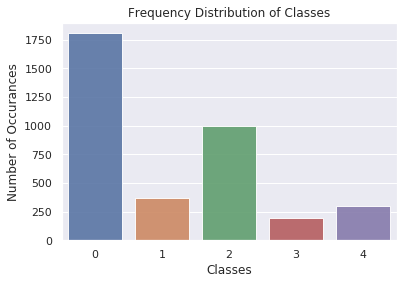

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
Class_Frequency_Count = df_train['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

# **Directory Structure Creation**

In [ ]:
!rm -rf Training_Dir
!rm -rf Validation_Dir

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [ ]:
import os

train_keyword = 'Training_Dir'
validation_keyword = 'Validation_Dir'
keywords = [train_keyword,validation_keyword]
dir_list = df_train['diagnosis'].tolist()

for keyword in keywords:
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  for class_dir in dir_list:
    if(not os.path.exists(keyword+'/'+str(class_dir))):
      os.mkdir(keyword+'/'+str(class_dir))

In [ ]:
import numpy as np
X = np.array(df_train.ix[:, df_train.columns == 'id_code'])
y = np.array(df_train.ix[:, df_train.columns == 'diagnosis'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
la =[]
count = 0
for x in X:
  if x in la:
    print('same')
  else:
    la.append(count)
    count=count+1


In [ ]:
X_update = np.array(la)
X_update =X_update.reshape(-1, 1)

In [ ]:
re = dict(zip(la,df_train['id_code'].tolist()))

In [ ]:
from sklearn.model_selection import train_test_split #  train,test = train_test_split(dataset,test_size=0.20,stratify=True)
train_images_temp, val_images, train_labels_temp, val_labels = train_test_split(X_update, y, test_size=0.2,stratify=y)

In [ ]:
#NU
split = int(0.7 * len(df_train)) # Change V2 0.8 to 0.7

train_dataframe = df_train.iloc[:split]
val_dataframe = df_train.iloc[split:]

#train_images = train_dataframe['id_code']
#train_labels = train_dataframe['diagnosis']
val_images = val_dataframe['id_code'].tolist()
val_labels = val_dataframe['diagnosis'].tolist()

In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '0': {}".format(sum(train_labels_temp==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_labels_temp==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(train_labels_temp==2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(train_labels_temp==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(train_labels_temp==4)))

sm = SMOTE('minority')
train_images, train_labels = sm.fit_sample(train_images_temp, train_labels_temp.ravel())

print('After OverSampling, the shape of train_X: {}'.format(train_images.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(train_labels.shape))

print("Before OverSampling, counts of label '0': {}".format(sum(train_labels==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(train_labels==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(train_labels==2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(train_labels==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(train_labels==4)))

Before OverSampling, counts of label '0': [1444]
Before OverSampling, counts of label '1': [296] 

Before OverSampling, counts of label '2': [799]
Before OverSampling, counts of label '3': [154] 

Before OverSampling, counts of label '4': [236]
After OverSampling, the shape of train_X: (4219, 1)
After OverSampling, the shape of train_y: (4219,) 

Before OverSampling, counts of label '0': 1444
Before OverSampling, counts of label '1': 296 

Before OverSampling, counts of label '2': 799
Before OverSampling, counts of label '3': 1444 

Before OverSampling, counts of label '4': 236


In [ ]:
train_temp=[]
for ds in train_images:
  train_temp.append(re[ds[0]])
train_images = train_temp
train_labels = train_labels.tolist()

val_temp=[]
for ds in val_images:
  val_temp.append(re[ds[0]])
val_images = val_temp
val_labels = val_labels.tolist()
cx = []
for l in val_labels:
  cx.append(l[0])
val_labels = cx

In [ ]:
list_of_tuples = list(zip(train_images,train_labels))
train_dataframe = pd.DataFrame(list_of_tuples,columns = ['id_code', 'diagnosis'])
train_dataframe = train_dataframe.sample(frac=1).reset_index(drop=True)
train_images = train_dataframe['id_code'].tolist()
train_labels = train_dataframe['diagnosis'].tolist()

In [ ]:
list_of_tuples = list(zip(val_images,val_labels))
val_dataframe = pd.DataFrame(list_of_tuples,columns = ['id_code', 'diagnosis'])
val_dataframe = val_dataframe.sample(frac=1).reset_index(drop=True)
val_images = val_dataframe['id_code'].tolist()
val_labels = val_dataframe['diagnosis'].tolist()

3    1444
0    1444
2     799
1     296
4     236
Name: diagnosis, dtype: int64



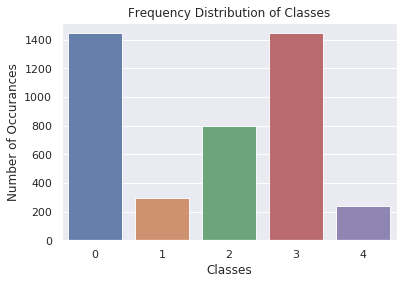

In [ ]:
Class_Frequency_Count = train_dataframe['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

0    361
2    200
1     74
4     59
3     39
Name: diagnosis, dtype: int64



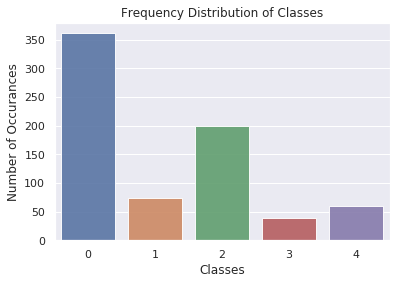

In [ ]:
Class_Frequency_Count = val_dataframe['diagnosis'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
#plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()

In [ ]:
import shutil as cf
for keyword in keywords:
  image_list = []
  class_list = []
  if(not os.path.exists(keyword)):
    os.mkdir(keyword)
  if keyword == train_keyword:
    image_list = train_images
    class_list = train_labels
  elif keyword == validation_keyword:
    image_list = val_images
    class_list = val_labels
  for image_info in image_list:
    cl = class_list[image_list.index(image_info)]
    cf.copy('Train_Images/'+str(image_info)+'.png', keyword+'/'+str(cl))

In [ ]:
!rm -rf Train_Images

# **Image Data Generator**

In [ ]:
import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

train_dir = 'Training_Dir'
validation_dir = 'Validation_Dir'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 120
val_batchsize = 40

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(299, 299),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(299, 299),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

1.14.0
Found 3127 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


# **Fine Tuning Model**

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
# Finetuning on 5-class dataset
base_model = InceptionResNetV2(include_top=False, pooling='avg', weights='imagenet', input_shape=(299, 299, 3))
outputs = Dense(5, activation='softmax')(base_model.output)
model = keras.Model(base_model.inputs, outputs)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1016 (Conv2D)            (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1016 (Batch (None, 149, 149, 32) 96          conv2d_1016[0][0]                
__________________________________________________________________________________________________
activation_1016 (Activation)    (None, 149, 149, 32) 0           batch_normalization_1016[0][0]   
__________________________________________________________________________________________________
conv2d_101

In [ ]:
for i, layer in enumerate(model.layers):
  if i < 776:
    layer.trainable = False
  else:
    layer.trainable = True

# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f44d7da9898> False
<keras.layers.convolutional.Conv2D object at 0x7f44d7da9080> False
<keras.layers.normalization.BatchNormalization object at 0x7f44d7d92518> False
<keras.layers.core.Activation object at 0x7f44d7d92470> False
<keras.layers.convolutional.Conv2D object at 0x7f44d4ce1198> False
<keras.layers.normalization.BatchNormalization object at 0x7f44d4cc07b8> False
<keras.layers.core.Activation object at 0x7f44d4c452b0> False
<keras.layers.convolutional.Conv2D object at 0x7f4825e88a20> False
<keras.layers.normalization.BatchNormalization object at 0x7f4825e57358> False
<keras.layers.core.Activation object at 0x7f4825e76208> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4825de5d30> False
<keras.layers.convolutional.Conv2D object at 0x7f4825dccd68> False
<keras.layers.normalization.BatchNormalization object at 0x7f4825d2a940> False
<keras.layers.core.Activation object at 0x7f4825d2ada0> False
<keras.layers.convolutional.Conv

# **Optimization & Model Compile**

In [ ]:
from keras.callbacks import LearningRateScheduler
from math import exp
epoch =20

In [ ]:
momentum = 0.9
sgd = keras.optimizers.SGD(lr=0.001, momentum=momentum, decay=0.0, nesterov=False)

In [ ]:
# Regular Model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

# **Fit Model**

In [ ]:
label_count=0
total_count=0
class_weights=0
from collections import Counter
labels_count = Counter(lbl for lbl in df_train['diagnosis'])
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in labels_count.items()}

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=epoch,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/20
27/26 [===============================] - 512s 19s/step - loss: 1.4489 - acc: 0.3726 - val_loss: 1.6182 - val_acc: 0.4925
Epoch 2/20
27/26 [===============================] - 454s 17s/step - loss: 1.2705 - acc: 0.5018 - val_loss: 1.6375 - val_acc: 0.4939
Epoch 3/20
27/26 [===============================] - 455s 17s/step - loss: 1.2195 - acc: 0.5147 - val_loss: 1.6715 - val_acc: 0.4966
Epoch 4/20
27/26 [===============================] - 443s 16s/step - loss: 1.1798 - acc: 0.5395 - val_loss: 1.7313 - val_acc: 0.5048
Epoch 5/20
27/26 [===============================] - 443s 16s/step - loss: 1.1368 - acc: 0.5514 - val_loss: 1.8377 - val_acc: 0.4980
Epoch 6/20
27/26 [===============================] - 456s 17s/step - loss: 1.1240 - acc: 0.5480 - val_loss: 1.6990 - val_acc: 0.5089
Epoch 7/20
27/26 [===============================] - 466s 17s/step - loss: 1.1020 - acc: 0.5724 - val_loss: 1.7227 - val_acc: 0.5102
Epoch 8/20
27/26 [===============================] - 466s 17s/step - 

# **Save Weights For Future Use**

In [ ]:
# Save Weights of the Model for Future Use
model.save_weights('Model_InceptionResnetV2.h5') # V2

# **Model Accuracy and Loss Plot**

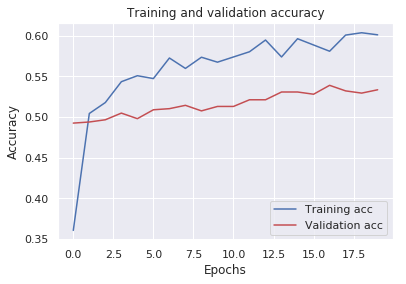

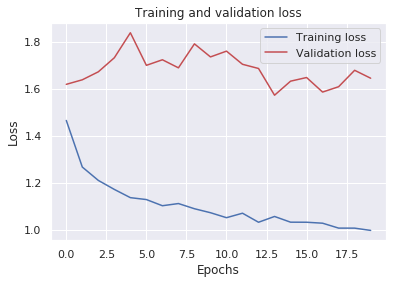

In [ ]:
# Plot

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Maximum Accuracy**

In [ ]:
# Max Accuracy

print("Validation Accuracy:", max(history.history['val_acc']))
print("Training Accuracy", max(history.history['acc']))

Validation Accuracy: 0.5388813119224116
Training Accuracy 0.6034537894793658
